## Cosmological recombination - solving Saha equation

We find the temperature and redshift at recombination, i.e. when electrons and protons in early universe first combined into neutral hydrogen. We use very simplified textbook approach and compare with more accurate numbers at the end.

In [1]:
%matplotlib inline
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.special import zeta
import scipy.constants as const

In [2]:
const.find('Boltz')

['Boltzmann constant',
 'Boltzmann constant in Hz/K',
 'Boltzmann constant in eV/K',
 'Boltzmann constant in inverse meters per kelvin',
 'Stefan-Boltzmann constant']

In [3]:
kB = const.value('Boltzmann constant in eV/K')
me = const.value('electron mass energy equivalent in MeV')*const.mega  # m_e in eV
Q = const.value('Rydberg constant times hc in eV')  # 13.6 eV

In [4]:
eta = 0.61e-9   # baryon-to-photon number ratio
TCMB = 2.7255   # CMB temperature today in K

Saha equation, giving fractional ionization of Hydrogen as a function of temperature. See e.g. B. Ryden, _Introduction to Cosmology_ (2nd ed.) Eq. (8.34).

In [5]:
def saha(kT, X=0.5):
    """Saha quation 
       
       kT -- temperature times Boltzmann constant
        X -- fractional ionization  
    """
    prefac = 2*zeta(3,1)/pi**2  * (2*pi)**(3/2)  # = 3.84
    return (1-X)/X**2 - prefac*eta*(abs(kT)/me)**1.5*exp(Q/(kT))

For numerical root finding we use `scipy`'s most robust 1D algorithm.

In [6]:
kTrec = brentq(saha, 0.1, 1., args=0.5); kTrec

0.3241601539095134

In [7]:
Trec = kTrec/kB; Trec  # recombination temperature in K

3761.7236733923664

In [8]:
zrec = Trec/TCMB - 1; zrec  # recombination redshift

1379.195807518755

In [9]:
def z(X):
    """Redshift z for given fractional ionization X"""
    kT = brentq(saha, 0.1, 1, args=X)
    return kT/(kB*TCMB) - 1

In [10]:
z(0.5)  # check

1379.195807518755

In [11]:
Xs = np.linspace(0.999, 0.0019, 100)
zs = []
for X in Xs:
    zs.append(z(X))

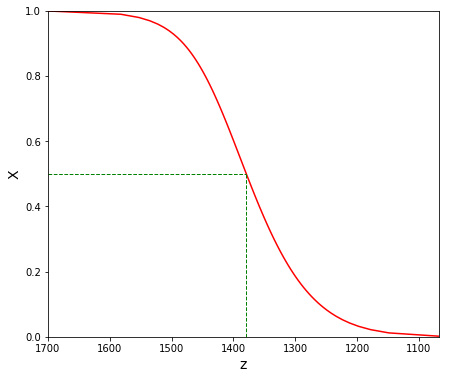

In [12]:
fig, ax = plt.subplots(figsize=[7,6])
ax.plot(zs, Xs, color='red', linestyle='-')
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel('X', fontsize=14)
ax.plot((z(Xs[0]), z(0.5)), (0.5, 0.5), 'g--', lw=1)
ax.plot((z(0.5), z(0.5)), (0, 0.5), 'g--', lw=1)
ax.set_xlim(zs[-1], zs[0])
ax.set_ylim(0,1)
ax.invert_xaxis()

### Comparison to Weinberg's numbers

In Table 2.1 of _Cosmology_ using the same simplified approach he gets (last column, for $\Omega_B h^2 = 0.03$) ionization 0.971 at 4200 K and 0.00401 at 3000 K. Formulas here give:

In [13]:
eta=(0.03/0.75**2)*8.7/1.67/4.11e8; eta   # eta corresponding to his 3rd column

6.760202223290644e-10

In [14]:
(z(0.971)+1)*TCMB   # Weinberg: 4200 K

4207.340632139071

In [15]:
(z(0.00401)+1)*TCMB # Weinberg: 3000 K

3004.681409759413

So this is in good agreement.

### Comparison to more careful treatment

Using careful detailed treatment of recombination physics (a la Peebles), in Table 2.2 Weinberg gets ionization of X=0.122, for z=1100 and T=3000 K. This is in agreement with <a href='https://en.wikipedia.org/wiki/Recombination_(cosmology)#The_effective_three-level_atom'>Wikipedia</a> which has 90% of neutrality at z=1070.

In [16]:
z(0.122)  # Weinberg: 1100

1275.8194984806066

In [17]:
(z(0.122)+1)*TCMB # Weinberg: 3000 K

3479.971543108893

So simplified treatment is accurate to some 15 %.